In [1]:
from PyPurityTools import PyPurityTools as ppt
from PyPurityFunctions import PyPurityFunctions as ppf
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import savgol_filter
import matplotlib.style
import matplotlib as mpl
import math
import scipy.fftpack
from scipy.signal import butter,filtfilt
import scipy.fftpack
import os
import statistics
import h5py as h5

In [2]:
hf_target=h5.File("results_2022_12_20.hdf5","r")

In [3]:
average_ch3=np.array(hf_target.get('average_ch3').value)
average_0_500_ch3=np.array(hf_target.get('average_0_500_ch3').value)
average_500_1000_ch3=np.array(hf_target.get('average_500_1000_ch3').value)
waveform_ch3_time=np.array(hf_target.get('waveform_ch3_time').value)
#smoothed_ch3_ave=np.array(hf_target.get('smoothed_ch3_ave').value)
#smoothed_ch3_time=np.array(hf_target.get('smoothed_ch3_time').value)

average_ch4=np.array(hf_target.get('average_ch4').value)
average_0_500_ch4=np.array(hf_target.get('average_0_500_ch4').value)
average_500_1000_ch4=np.array(hf_target.get('average_500_1000_ch4').value)
waveform_ch4_time=np.array(hf_target.get('waveform_ch4_time').value)
#smoothed_ch4_ave=np.array(hf_target.get('smoothed_ch4_ave').value)
#smoothed_ch4_time=np.array(hf_target.get('smoothed_ch4_time').value)

average_bkg_ch3=np.array(hf_target.get('average_bkg_ch3').value)
average_bkg_0_500_ch3=np.array(hf_target.get('average_bkg_0_500_ch3').value)
average_bkg_500_1000_ch3=np.array(hf_target.get('average_bkg_500_1000_ch3').value)
bkg_time_ch3=np.array(hf_target.get('bkg_time_ch3').value)
#smoothed_ch3_bkg_ave=np.array(hf_target.get('smoothed_ch3_bkg_ave').value)
#smoothed_ch3_bkg_time=np.array(hf_target.get('smoothed_ch3_bkg_time').value)

average_bkg_ch4=np.array(hf_target.get('average_bkg_ch4').value)
average_bkg_0_500_ch4=np.array(hf_target.get('average_bkg_0_500_ch4').value)
average_bkg_500_1000_ch4=np.array(hf_target.get('average_bkg_500_1000_ch4').value)
bkg_time_ch4=np.array(hf_target.get('bkg_time_ch4').value)
#smoothed_ch4_bkg_ave=np.array(hf_target.get('smoothed_ch4_bkg_ave').value)
#smoothed_ch4_bkg_time=np.array(hf_target.get('smoothed_ch4_bkg_time').value)

#ave_clean_ch3=np.array(hf_target.get('ave_clean_ch3').value)
#ave_clean_ch4=np.array(hf_target.get('ave_clean_ch4').value)
#ave_clean_ch3_smooth=np.array(hf_target.get('ave_clean_ch3_smooth').value)
#ave_clean_ch4_smooth=np.array(hf_target.get('ave_clean_ch4_smooth').value)

In [4]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [15.0, 10.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

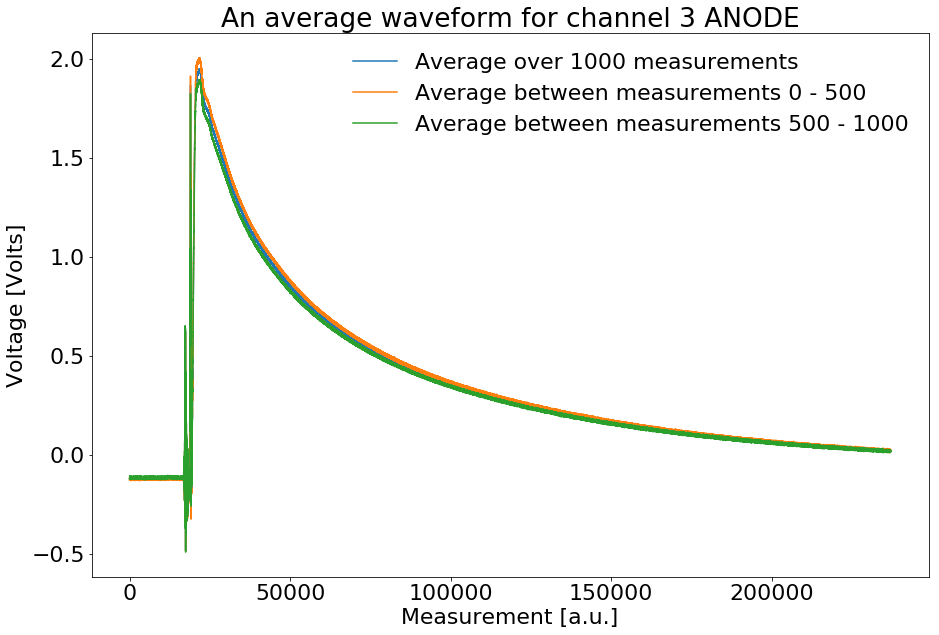

In [5]:
fig, ax = plt.subplots()
ax.plot(waveform_ch3_time,average_ch3,label="Average over 1000 measurements")
ax.plot(waveform_ch3_time,average_0_500_ch3,label="Average between measurements 0 - 500")
ax.plot(waveform_ch3_time,average_500_1000_ch3,label="Average between measurements 500 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE")
ax.legend()

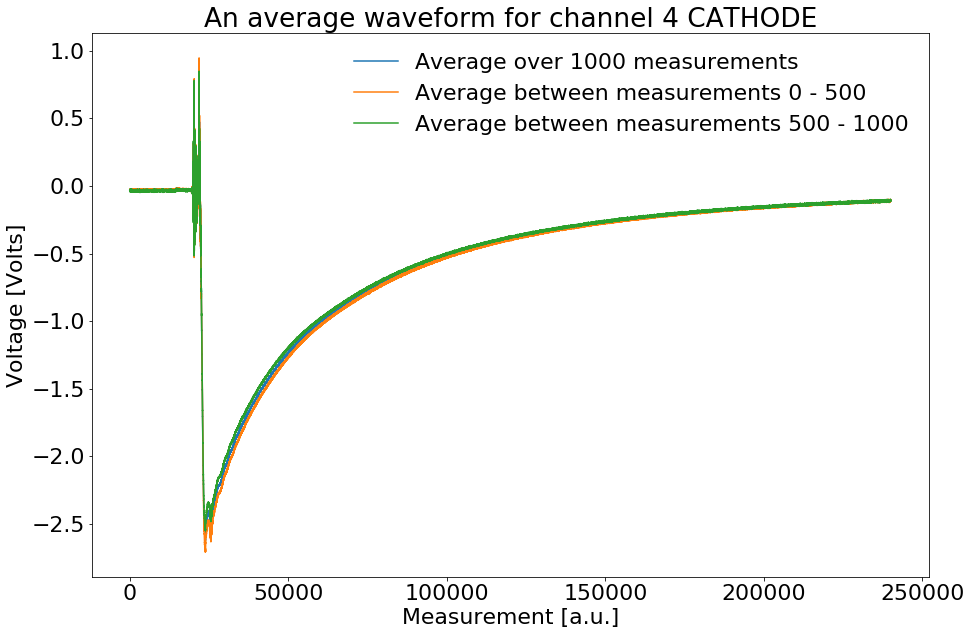

In [6]:
fig, ax = plt.subplots()
ax.plot(waveform_ch4_time,average_ch4,label="Average over 1000 measurements")
ax.plot(waveform_ch4_time,average_0_500_ch4,label="Average between measurements 0 - 500")
ax.plot(waveform_ch4_time,average_500_1000_ch4,label="Average between measurements 500 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 4 CATHODE")
ax.legend()

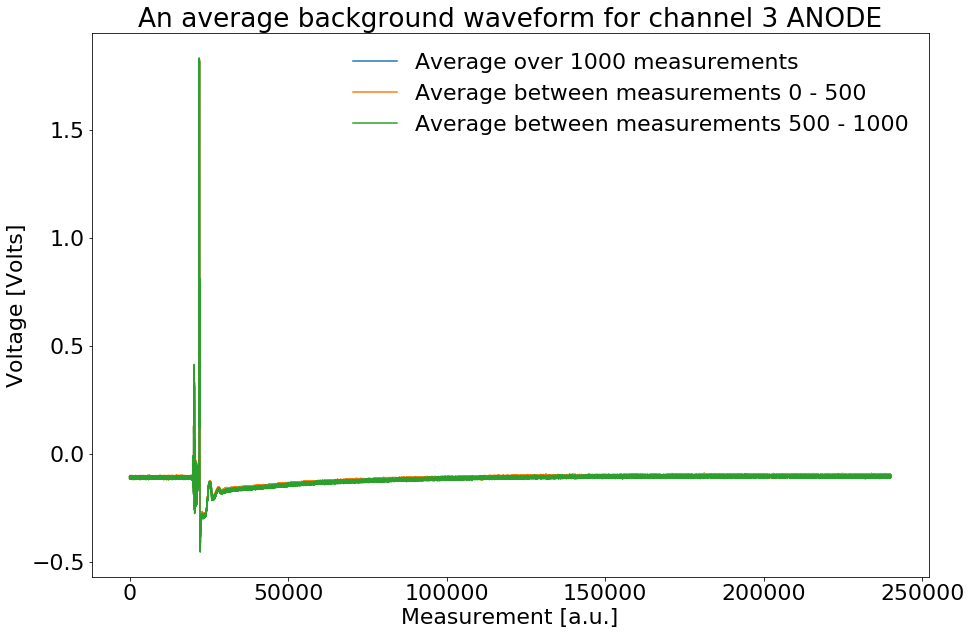

In [7]:
fig, ax = plt.subplots()
ax.plot(bkg_time_ch3,average_bkg_ch3,label="Average over 1000 measurements")
ax.plot(bkg_time_ch3,average_bkg_0_500_ch3,label="Average between measurements 0 - 500")
ax.plot(bkg_time_ch3,average_bkg_500_1000_ch3,label="Average between measurements 500 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average background waveform for channel 3 ANODE")
ax.legend()

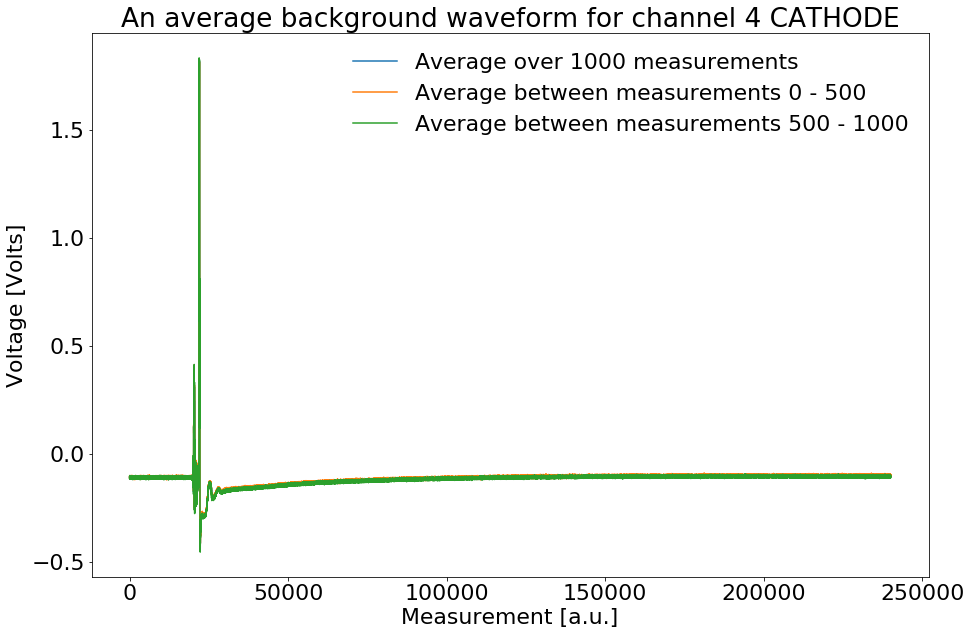

In [8]:
fig, ax = plt.subplots()
ax.plot(bkg_time_ch4,average_bkg_ch4,label="Average over 1000 measurements")
ax.plot(bkg_time_ch4,average_bkg_0_500_ch4,label="Average between measurements 0 - 500")
ax.plot(bkg_time_ch4,average_bkg_500_1000_ch4,label="Average between measurements 500 - 1000")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average background waveform for channel 4 CATHODE")
ax.legend()

In [12]:
smoothed_ch3_ave=ppf.smoothed_average(average_ch3,10)
smoothed_ch4_ave=ppf.smoothed_average(average_ch4,10)
smoothed_ch3_bkg_ave=ppf.smoothed_average(average_bkg_ch3,10)
smoothed_ch4_bkg_ave=ppf.smoothed_average(average_bkg_ch4,10)
smoothed_ch3_time=np.arange(len(smoothed_ch3_ave))
smoothed_ch4_time=np.arange(len(smoothed_ch4_ave))
smoothed_ch3_bkg_time=np.arange(len(smoothed_ch3_bkg_ave))
smoothed_ch4_bkg_time=np.arange(len(smoothed_ch4_bkg_ave))

In [21]:
smoothed_ch3_ave_100=ppf.smoothed_average(average_ch3,100)
smoothed_ch4_ave_100=ppf.smoothed_average(average_ch4,100)
smoothed_ch3_bkg_ave_100=ppf.smoothed_average(average_bkg_ch3,100)
smoothed_ch4_bkg_ave_100=ppf.smoothed_average(average_bkg_ch4,100)
smoothed_ch3_time_100=np.arange(len(smoothed_ch3_ave_100))
smoothed_ch4_time_100=np.arange(len(smoothed_ch4_ave_100))
smoothed_ch3_bkg_time_100=np.arange(len(smoothed_ch3_bkg_ave_100))
smoothed_ch4_bkg_time_100=np.arange(len(smoothed_ch4_bkg_ave_100))

In [24]:
smoothed_ch3_ave_50=ppf.smoothed_average(average_ch3,50)
smoothed_ch4_ave_50=ppf.smoothed_average(average_ch4,50)
smoothed_ch3_bkg_ave_50=ppf.smoothed_average(average_bkg_ch3,50)
smoothed_ch4_bkg_ave_50=ppf.smoothed_average(average_bkg_ch4,50)
smoothed_ch3_time_50=np.arange(len(smoothed_ch3_ave_50))
smoothed_ch4_time_50=np.arange(len(smoothed_ch4_ave_50))
smoothed_ch3_bkg_time_50=np.arange(len(smoothed_ch3_bkg_ave_50))
smoothed_ch4_bkg_time_50=np.arange(len(smoothed_ch4_bkg_ave_50))

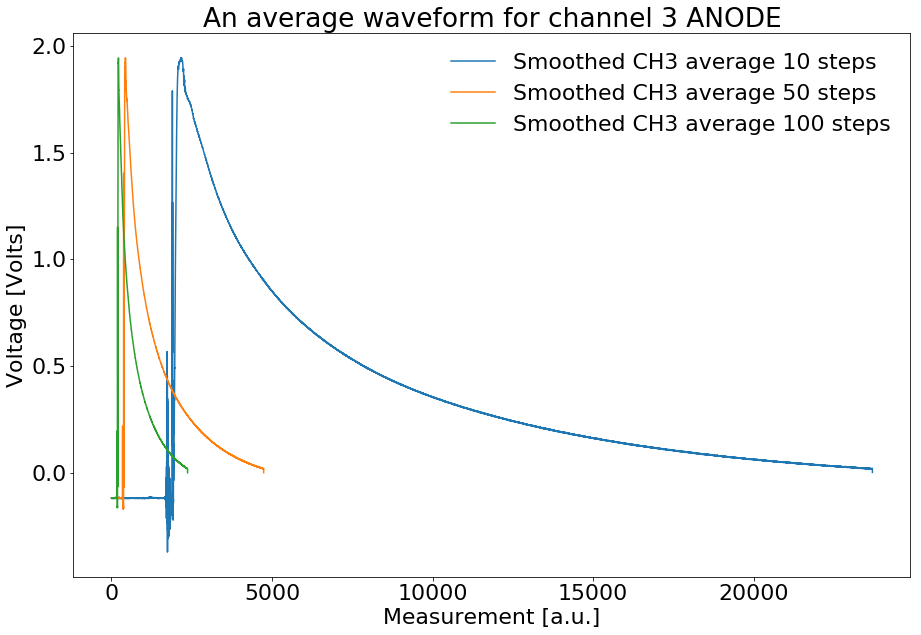

In [25]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_time,smoothed_ch3_ave,label="Smoothed CH3 average 10 steps")
ax.plot(smoothed_ch3_time_50,smoothed_ch3_ave_50,label="Smoothed CH3 average 50 steps")
ax.plot(smoothed_ch3_time_100,smoothed_ch3_ave_100,label="Smoothed CH3 average 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average waveform for channel 3 ANODE")
ax.legend()

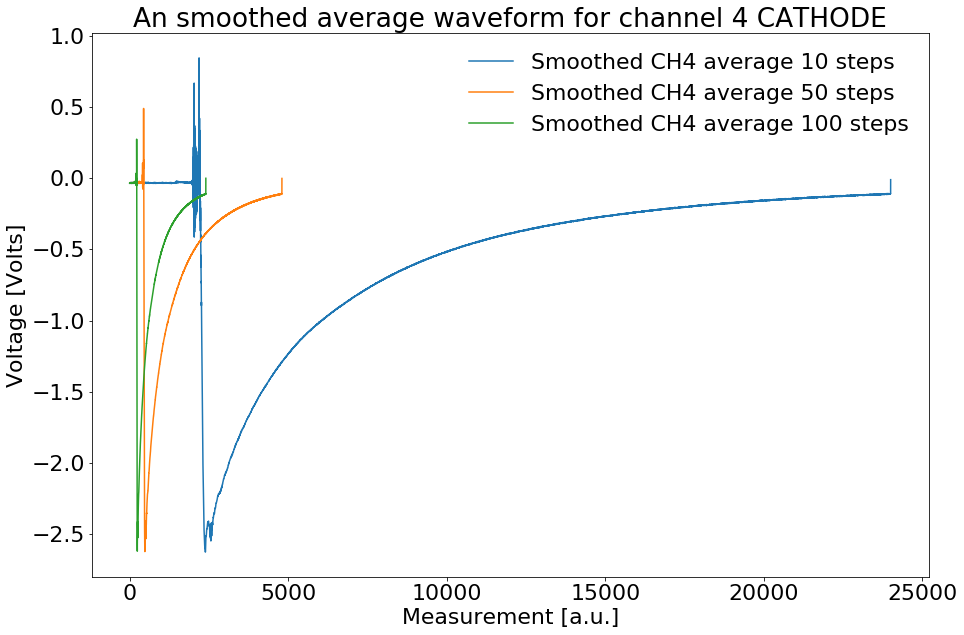

In [26]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_time,smoothed_ch4_ave,label="Smoothed CH4 average 10 steps")
ax.plot(smoothed_ch4_time_50,smoothed_ch4_ave_50,label="Smoothed CH4 average 50 steps")
ax.plot(smoothed_ch4_time_100,smoothed_ch4_ave_100,label="Smoothed CH4 average 100 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An smoothed average waveform for channel 4 CATHODE")
ax.legend()

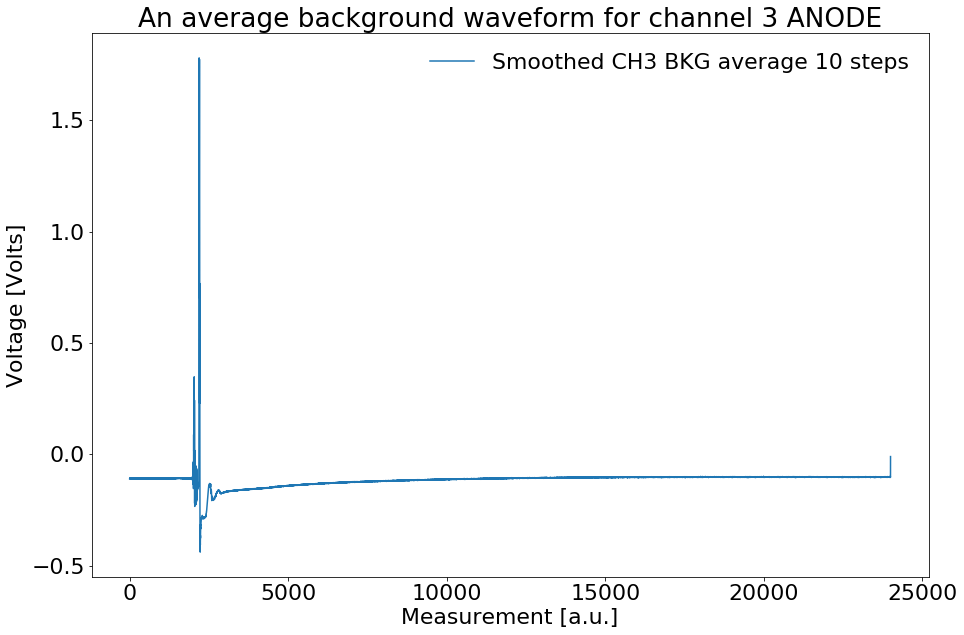

In [19]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch3_bkg_time,smoothed_ch3_bkg_ave,label="Smoothed CH3 BKG average 10 steps")
ax.plot(smoothed_ch3_bkg_time,smoothed_ch3_bkg_ave,label="Smoothed CH3 BKG average 10 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average background waveform for channel 3 ANODE")
ax.legend()

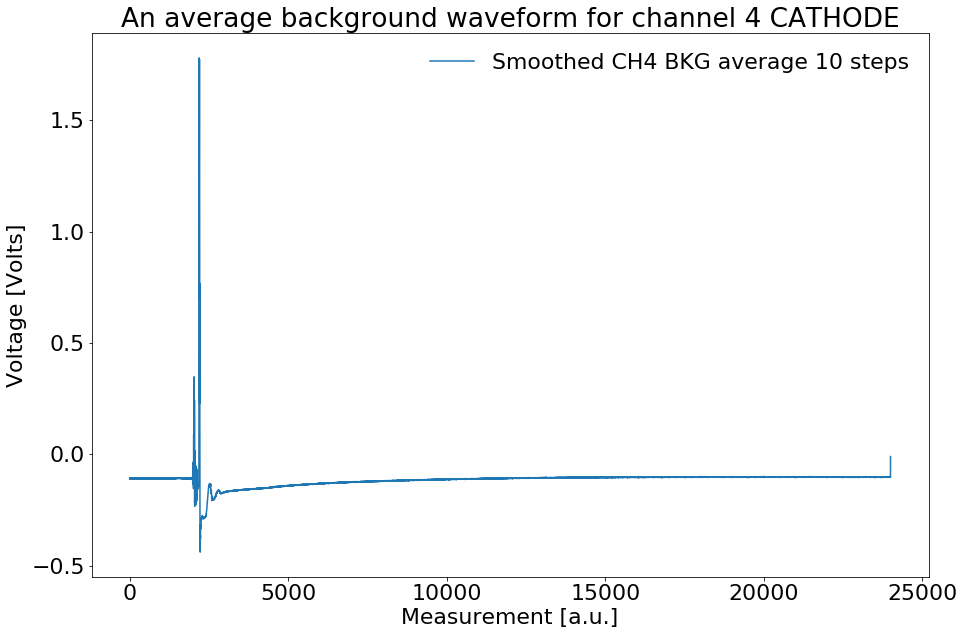

In [20]:
fig, ax = plt.subplots()
ax.plot(smoothed_ch4_bkg_time,smoothed_ch4_bkg_ave,label="Smoothed CH4 BKG average 10 steps")
ax.set_xlabel("Measurement [a.u.]")
ax.set_ylabel("Voltage [Volts]")
ax.set_title("An average background waveform for channel 4 CATHODE")
ax.legend()